In [4]:
#import data by pandas lib.
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
tem_df =pd.read_csv('data_for_predictions.csv')

# Check the data types of each column
print(tem_df)

       Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0               0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944   
1               1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000   
2               2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000   
3               3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000   
4               4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000   
...           ...                               ...       ...           ...   
14601       14601  18463073fb097fc0ac5d3e040f356987  4.508812      4.680707   
14602       14602  d0a6f71671571ed83b2645d23af6de00  3.858778      0.000000   
14603       14603  10e6828ddd62cbcf687cb74928c4c2d2  3.265996      0.000000   
14604       14604  1cf20fd6206d7678d5bcafd28c53b4db  2.120574      0.000000   
14605       14605  563dde550fd624d7352f3de77c0cdfcd  3.941064      0.000000   

       cons_last_month  forecast_cons_12m  forecast

In [7]:
# Drop column 'B'
per_df = tem_df.drop('id', axis=1)

# Display the DataFrame after dropping the column
print(per_df)


       Unnamed: 0  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0               0  0.000000      4.739944         0.000000           0.000000   
1               1  3.668479      0.000000         0.000000           2.280920   
2               2  2.736397      0.000000         0.000000           1.689841   
3               3  3.200029      0.000000         0.000000           2.382089   
4               4  3.646011      0.000000         2.721811           2.650065   
...           ...       ...           ...              ...                ...   
14601       14601  4.508812      4.680707         0.000000           3.667360   
14602       14602  3.858778      0.000000         2.260071           2.801191   
14603       14603  3.265996      0.000000         2.255273           2.281919   
14604       14604  2.120574      0.000000         0.000000           1.308351   
14605       14605  3.941064      0.000000         0.000000           2.882758   

       forecast_discount_en

<function matplotlib.pyplot.show(close=None, block=None)>

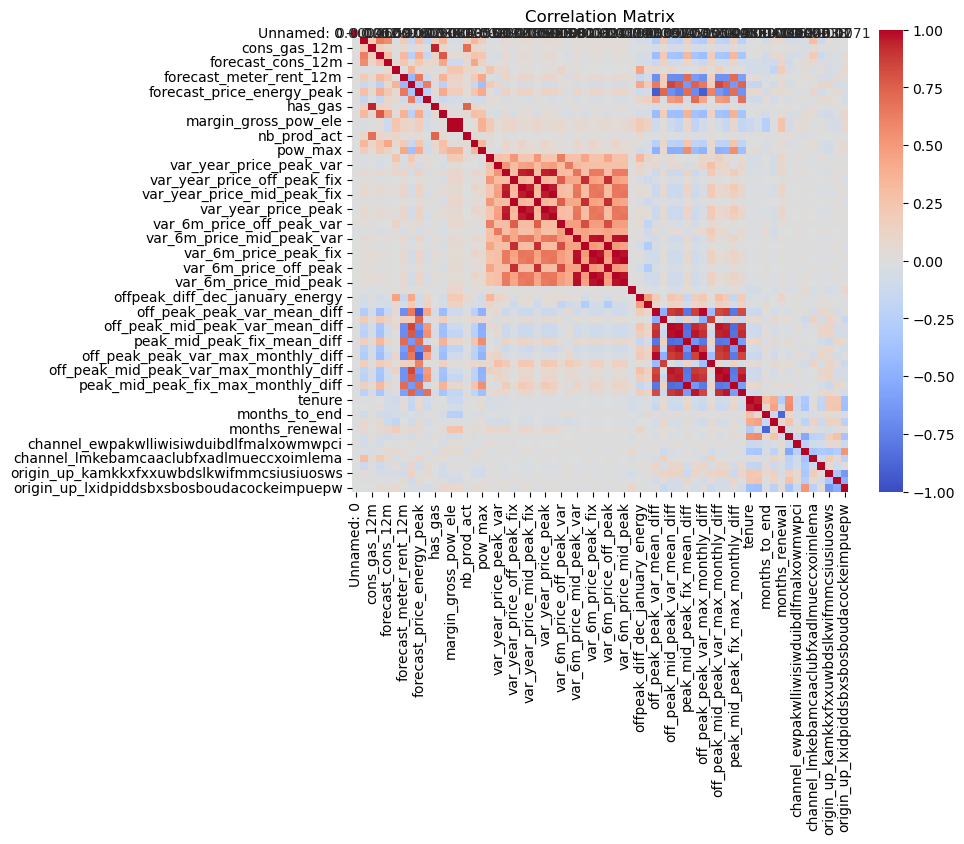

In [9]:
import seaborn as sns
# Compute correlation matrix
corr_matrix = per_df.corr()



# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Display the plot
plt.title("Correlation Matrix")
plt.show

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
# Min-Max Scaling
scaler = MinMaxScaler()
df_minmax_scaled = scaler.fit_transform(per_df)

print("Min-Max Scaled Data:\n", df_minmax_scaled)

Min-Max Scaled Data:
 [[0.00000000e+00 0.00000000e+00 7.16162837e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.84697022e-05 5.40046960e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.36939404e-04 4.02832501e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99863061e-01 4.80796363e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [9.99931530e-01 3.12175556e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 5.80174935e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


In [20]:
# Standardization
scaler = StandardScaler()
df_standardized = scaler.fit_transform(per_df)

print("Standardized Data:\n", df_standardized)


Standardized Data:
 [[-1.73193223 -4.77559131  2.30673881 ... -0.64529688 -0.52415889
   1.02861689]
 [-1.73169506 -0.62800351 -0.45383732 ...  1.54967431 -0.52415889
  -0.97217926]
 [-1.73145789 -1.68181745 -0.45383732 ...  1.54967431 -0.52415889
  -0.97217926]
 ...
 [ 1.73145789 -1.08305107 -0.45383732 ... -0.64529688 -0.52415889
   1.02861689]
 [ 1.73169506 -2.37806734 -0.45383732 ... -0.64529688 -0.52415889
   1.02861689]
 [ 1.73193223 -0.31981865 -0.45383732 ... -0.64529688  1.90781846
  -0.97217926]]


In [21]:
# Normalization (L2)
normalizer = Normalizer(norm='l2')
df_normalized = normalizer.fit_transform(per_df)
print("L2 Normalized Data:\n", df_normalized)



L2 Normalized Data:
 [[0.00000000e+00 0.00000000e+00 6.69274670e-03 ... 0.00000000e+00
  0.00000000e+00 1.41198856e-03]
 [6.64963883e-03 2.43940611e-02 0.00000000e+00 ... 6.64963883e-03
  0.00000000e+00 0.00000000e+00]
 [1.37676467e-02 1.88368701e-02 0.00000000e+00 ... 6.88382334e-03
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99972516e-01 2.23646279e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.84771975e-05]
 [9.99968126e-01 1.45200379e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.84722081e-05]
 [9.99929421e-01 2.69824432e-04 0.00000000e+00 ... 0.00000000e+00
  6.84648696e-05 0.00000000e+00]]


In [22]:
from sklearn.model_selection import train_test_split
# Splitting features and target
X = per_df.drop('churn', axis=1)  # Features (dropping the target column)
y = per_df['churn']  # Target (dependent variable)



In [23]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Create Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9000684462696783
Confusion Matrix:
[[2615    2]
 [ 290   15]]
